In [ ]:
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

my_api='KPRwPqRju8WONO1AJTnZzBDOjSeNzjzy'
with MPRester(api_key=my_api) as mpr:
    # 首先检索相关结构
    structure = mpr.get_structure_by_material_id('mp-22856')

# 使用常规结构很重要，以确保峰用常规米勒指数标记
sga = SpacegroupAnalyzer(structure)
conventional_structure = sga.get_conventional_standard_structure()

# 该示例显示如何获取XRD衍射图案
# 这些图案从结构实时计算而来
calculator = XRDCalculator(wavelength='CuKa')
pattern = calculator.get_pattern(conventional_structure)
pattern

: 

In [5]:
z = pattern.hkls
x = pattern.x
y = pattern.y
x2 = np.array([x,y])
a = pd.DataFrame(x,columns=['2theta'])
a['intensity'] = y
a
index = a[a['2theta'] ==a['2theta'] ].index.tolist() 



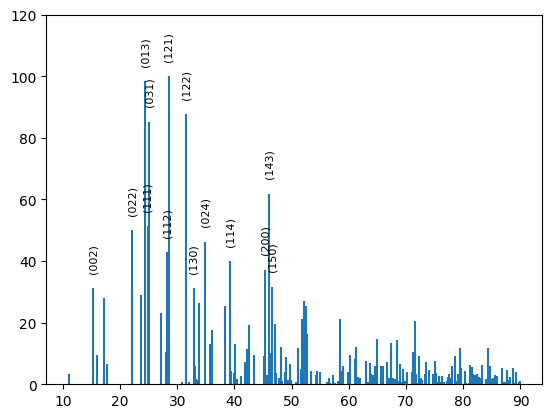

In [27]:
x = a['2theta']
y = a['intensity']
plt.vlines(x,0,y)
#plt.scatter(x, y, marker="x", )
plt.ylim(0,120)
for i in x:
    j = a[a['2theta'] == i ].index.tolist()[0] 
    r=''
    for k in range(3):
        r += str(z[j][0]['hkl'][k])
    if y[j]>30:
        plt.annotate(f"({r})", xy=(x[j], y[j]), xytext=(i,y[j]+5),ha = 'center',va = 'bottom',fontsize =8,rotation=90)
    